In [1]:
import pandas as pd
from pandasai.llm.openai import OpenAI
from langchain_openai import ChatOpenAI
from pandasai import SmartDataframe
from dotenv import load_dotenv
from langchain_experimental.agents import create_pandas_dataframe_agent
import plotly.express as px

In [2]:
# Load environment variables from .env (ensure you have OpenAI keys set here)
load_dotenv()

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("basededados_aulat7.csv")

In [3]:
question = "Evolução da quantidade"
prompt_question = f"Retorne dataframe sobre:{question}"
llm = OpenAI(temperature=0)
sdf = SmartDataframe(df, config={"llm": llm})
filtered_df = sdf.chat(prompt_question)


{'type': 'dataframe', 'value':         Data  Quantidade
0 2022-02-01         961
1 2022-02-02        1082
2 2022-02-03         328
3 2022-02-04        5000
4 2022-02-05         484}


In [4]:
# Initialize LangChain's OpenAI model for broader language tasks
chat_openai = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

In [5]:
chart_prompt_template = f"""
Suggest the most appropriate chart for visualizing the data, taking into account the columns and the type of analysis:
- Bar chart for comparisons between categories.
- Line chart for time-series data.
- Pie chart for proportions.
- Histogram for distributions.
Return only the best chart
"""
agent_chart = create_pandas_dataframe_agent(chat_openai, filtered_df, verbose=True, allow_dangerous_code=True)
chart = agent_chart.run(chart_prompt_template)

C:\Users\PedroLustosa\AppData\Local\Temp\ipykernel_13792\3508446072.py:10: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  chart = agent_chart.run(chart_prompt_template)


Thought: We have a date column and a quantity column, which suggests that a line chart for time-series data would be the most appropriate visualization.
Action: 
python_repl_ast
Action Input: 
print(df.dtypes)Data          datetime64[ns]
Quantidade             int64
dtype: object
The 'Data' column is of type datetime and 'Quantidade' is of type integer, confirming that a line chart for time-series data would be the most appropriate visualization.
Final Answer: Line chart

> Finished chain.


In [6]:
chart_prompt_insghts = """You are a data analysis expert. Provide some powerfull insights."""
agent_insghts = create_pandas_dataframe_agent(chat_openai, filtered_df, verbose=True, allow_dangerous_code=True)
insghts = agent_insghts.run(chart_prompt_insghts)

Thought: I can calculate some basic statistics to provide insights.
Action: python_repl_ast
Action Input: df.describe()        Quantidade
count     5.000000
mean   1571.000000
std    1942.670842
min     328.000000
25%     484.000000
50%     961.000000
75%    1082.000000
max    5000.000000The data seems to have a wide range of values, with a mean of 1571 and a standard deviation of 1942.67.
Final Answer: The data shows that the average quantity is 1571 with a standard deviation of 1942.67.

> Finished chain.


Thought: To plot a line chart, we need to use a plotting library like matplotlib or seaborn.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltNow that we have imported matplotlib, we can proceed to plot the line chart.
Action: python_repl_ast
Action Input: plt.plot(df['Data'], df['Quantidade'])[<matplotlib.lines.Line2D object at 0x000002546FF613D0>]The line chart has been plotted successfully.
Final Answer: The line chart based on Evolução da quantidade has been plotted.

> Finished chain.


'The line chart based on Evolução da quantidade has been plotted.'

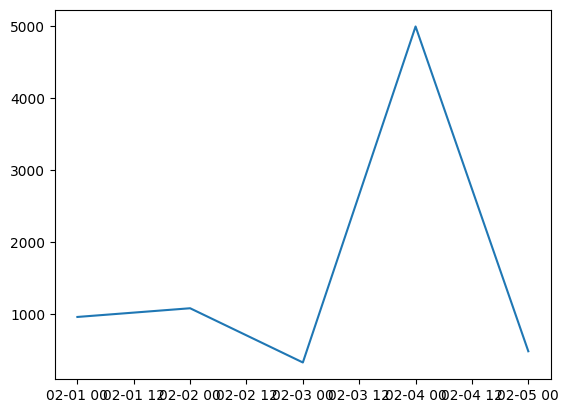

In [7]:
agent_final = create_pandas_dataframe_agent(chat_openai, filtered_df, verbose=True, allow_dangerous_code=True)
agent_final.run(f"Plot {chart} base on {question}.")